In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import scipy.stats as stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
# load the data
df = pd.read_csv('mobile_price_range_data.csv')

#### Data Exploration

In [3]:
df.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [4]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
df.isnull().sum().sum()

0

In [6]:
df.shape

(2000, 21)

In [7]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [9]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


<AxesSubplot:>

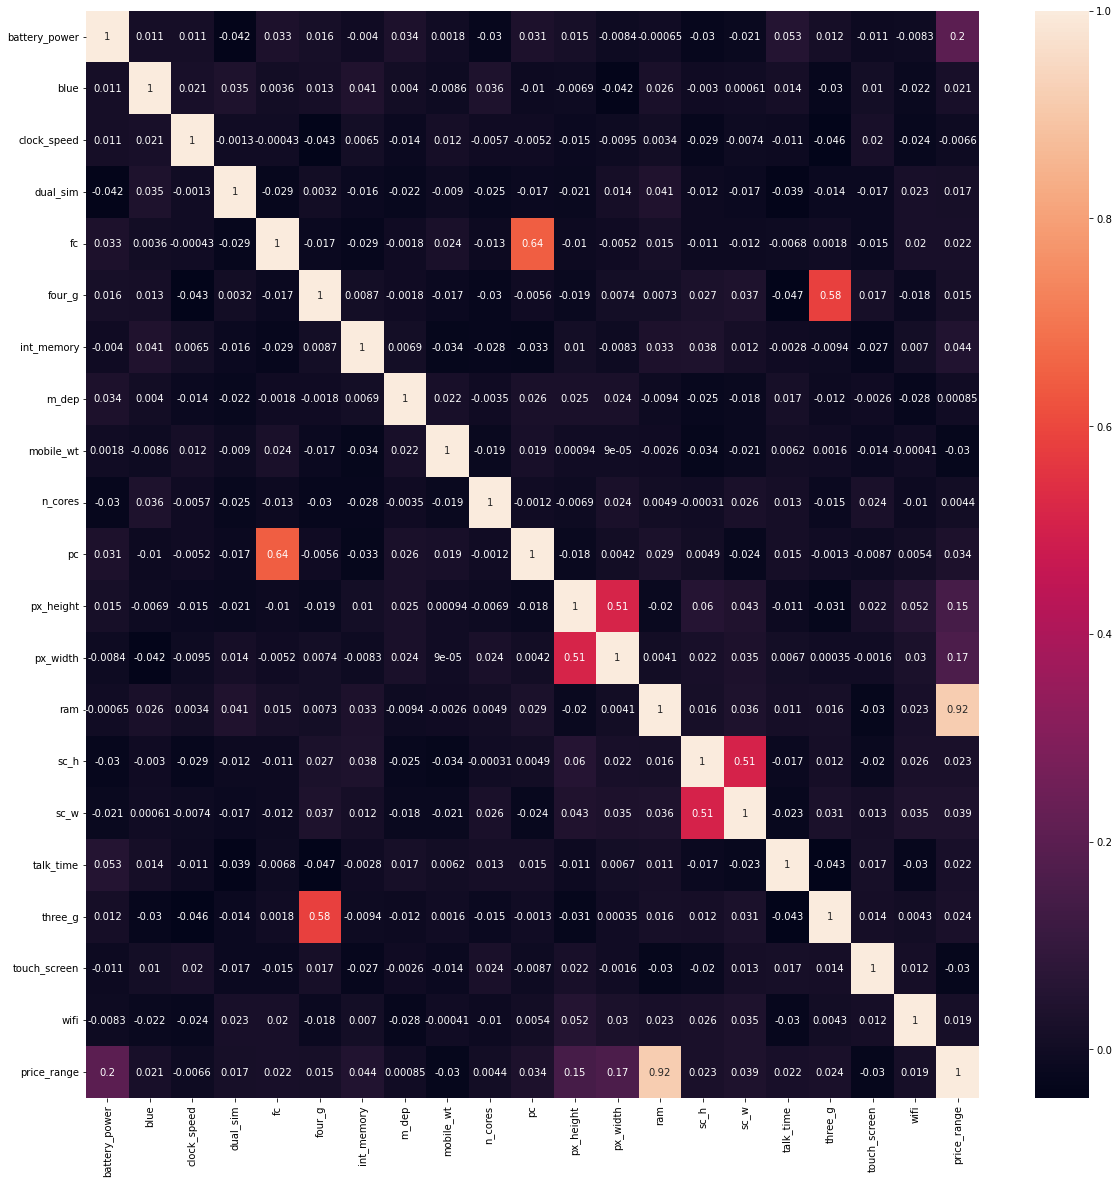

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

In [11]:
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [12]:
df['ram'].value_counts()

1464    4
3142    4
2610    4
2227    4
1229    4
       ..
2312    1
2167    1
3508    1
297     1
3919    1
Name: ram, Length: 1562, dtype: int64

<AxesSubplot:xlabel='ram', ylabel='Count'>

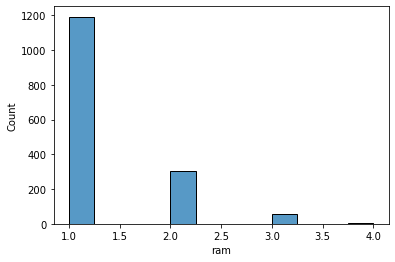

In [13]:
sns.histplot(x=df['ram'].value_counts())

<AxesSubplot:xlabel='ram', ylabel='price_range'>

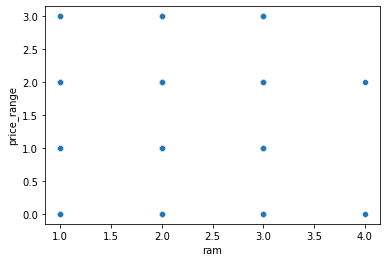

In [14]:
sns.scatterplot(x=df['ram'].value_counts(),y=df['price_range'])

In [15]:
df['px_height'].value_counts().head(10)

347    7
179    6
371    6
275    6
674    5
286    5
42     5
211    5
649    5
398    5
Name: px_height, dtype: int64

<AxesSubplot:ylabel='Count'>

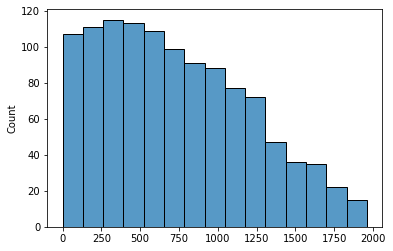

In [16]:
sns.histplot(df['px_height'].value_counts().keys(), bins=15)

In [17]:
df['px_width'].value_counts()

874     7
1247    7
1383    6
1463    6
1469    6
       ..
1125    1
1367    1
1569    1
1481    1
1632    1
Name: px_width, Length: 1109, dtype: int64

<AxesSubplot:ylabel='Count'>

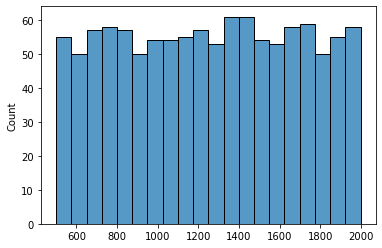

In [18]:
sns.histplot(df['px_width'].value_counts().keys(), bins=20)

In [19]:
df['battery_power'].value_counts()

1872    6
618     6
1589    6
1715    5
1807    5
       ..
660     1
1452    1
1005    1
1372    1
858     1
Name: battery_power, Length: 1094, dtype: int64

<AxesSubplot:ylabel='Count'>

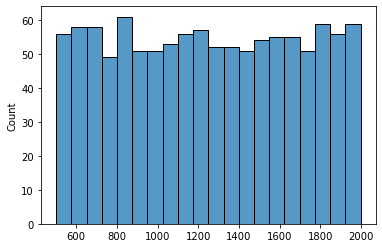

In [20]:
sns.histplot(df['battery_power'].value_counts().keys(), bins=20)

C:\Users\sahil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ram'>

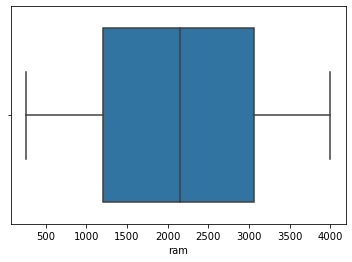

In [21]:
sns.boxplot(df['ram'])

C:\Users\sahil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='battery_power'>

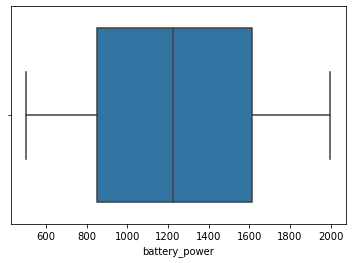

In [22]:
sns.boxplot(df['battery_power'])

C:\Users\sahil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='px_height'>

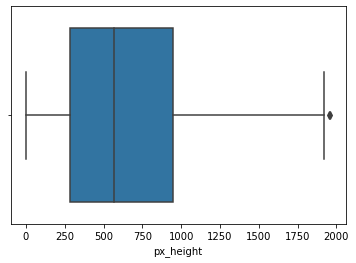

In [23]:
sns.boxplot(df['px_height'])

C:\Users\sahil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='px_width'>

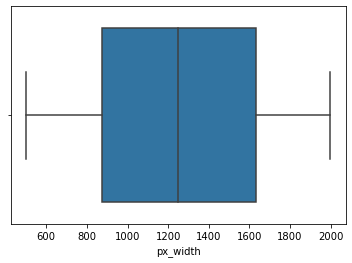

In [24]:
sns.boxplot(df['px_width'])

<AxesSubplot:xlabel='battery_power', ylabel='px_height'>

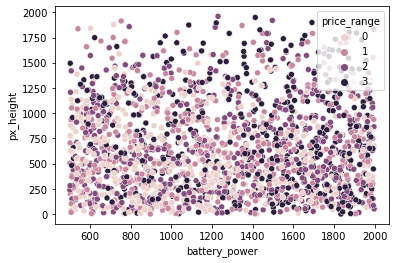

In [25]:
sns.scatterplot(x=df['battery_power'],y=df['px_height'],hue=df['price_range'])

<AxesSubplot:xlabel='price_range', ylabel='px_height'>

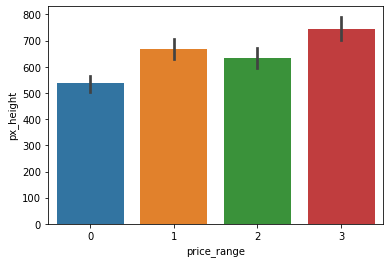

In [26]:
sns.barplot(x=df['price_range'], y = df['px_height'])

<AxesSubplot:xlabel='price_range', ylabel='px_width'>

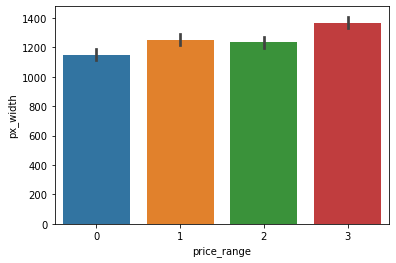

In [27]:
sns.barplot(x=df['price_range'], y = df['px_width'])

<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

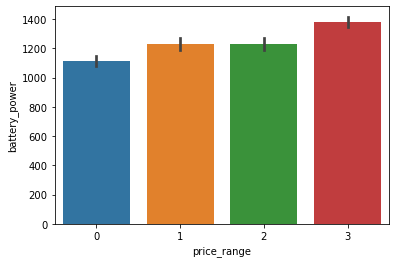

In [28]:
sns.barplot(x=df['price_range'], y = df['battery_power'])

In [29]:
df.groupby(["price_range"]).count()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
price_range,,,,,,,,,,,,,,,,,,,,
0,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500
1,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500
2,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500
3,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500


### Removing the outliers

In [30]:
df1 = df.drop([1960], axis=0)

In [31]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [32]:
print(df.shape)
print(df1.shape)

(2000, 21)
(1999, 21)


In [33]:
x = df1[['battery_power','px_height','px_width','ram']]
y = df1['price_range']

In [34]:
x

,battery_power,px_height,px_width,ram
0,842,20,756,2549
1,1021,905,1988,2631
2,563,1263,1716,2603
3,615,1216,1786,2769
4,1821,1208,1212,1411
...,...,...,...,...
1995,794,1222,1890,668
1996,1965,915,1965,2032
1997,1911,868,1632,3057
1998,1512,336,670,869


In [35]:
# Splitting data between training and testing set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [36]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1499, 4)
(500, 4)
(1499,)
(500,)


### Building Logistic Regression model

In [37]:
m1 = LogisticRegression()
m1.fit(x_train,y_train)
y_pred = m1.predict(x_test)
print("Training Score:",m1.score(x_train,y_train))
print("Testing Score:",m1.score(x_test,y_test))



Training Score: 0.9573048699132756
Testing Score: 0.968


C:\Users\sahil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))# y_test goes into the rows and y_pred goes into columns

Confusion Matrix:
[[134   3   0   0]
 [  3 123   3   0]
 [  0   1 108   4]
 [  0   0   2 119]]


In [39]:
print("Classification_report: ")
print(classification_report(y_test,y_pred))

Classification_report: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       137
           1       0.97      0.95      0.96       129
           2       0.96      0.96      0.96       113
           3       0.97      0.98      0.98       121

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500



In [40]:
test1 = pd.DataFrame()

In [41]:
test1['price_org'] = y_test

In [42]:
test1['logistic_pred'] = y_pred

In [43]:
test1

,price_org,logistic_pred
937,2,2
1935,1,1
455,2,2
441,1,1
1574,3,3
...,...,...
965,3,3
833,3,3
1843,3,3
1814,1,1


### KNN Classification

In [44]:
m2 = KNeighborsClassifier(n_neighbors=21)
m2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=21)

In [45]:
y_predkn = m1.predict(x_test)
print("Training Score : ",m1.score(x_train,y_train)) 
print("Testing Score : ",m1.score(x_test,y_test)) 

Training Score :  0.9573048699132756
Testing Score :  0.968


In [46]:
matrix = confusion_matrix(y_test,y_predkn)# x_test goes into the rows
print(matrix)

[[134   3   0   0]
 [  3 123   3   0]
 [  0   1 108   4]
 [  0   0   2 119]]


In [47]:
print(classification_report(y_test,y_predkn))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       137
           1       0.97      0.95      0.96       129
           2       0.96      0.96      0.96       113
           3       0.97      0.98      0.98       121

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500



In [48]:
test1['kn_pred'] = y_predkn
test1

,price_org,logistic_pred,kn_pred
937,2,2,2
1935,1,1,1
455,2,2,2
441,1,1,1
1574,3,3,3
...,...,...,...
965,3,3,3
833,3,3,3
1843,3,3,3
1814,1,1,1


### SVM

In [49]:
s1 = SVC(kernel='linear',C=1)
s1.fit(x_train,y_train)

SVC(C=1, kernel='linear')

In [50]:
y_predsvm = s1.predict(x_test)

In [51]:
print("Training Score : ",s1.score(x_train,y_train)) 
print("Testing Score : ",s1.score(x_test,y_test)) 

Training Score :  0.9593062041360907
Testing Score :  0.968


In [52]:
matrix = confusion_matrix(y_test,y_predsvm)# x_test goes into the rows
print(matrix)

[[135   2   0   0]
 [  4 122   3   0]
 [  0   1 108   4]
 [  0   0   2 119]]


In [53]:
print(classification_report(y_test,y_predsvm))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       137
           1       0.98      0.95      0.96       129
           2       0.96      0.96      0.96       113
           3       0.97      0.98      0.98       121

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500



In [54]:
test1['svm_pred'] = y_predsvm

#### RBF Kernel

In [55]:
s2 = SVC(kernel='rbf',gamma=0.00001,C=10)
s2.fit(x_train,y_train)

SVC(C=10, gamma=1e-05)

In [56]:
y_predrbf = s2.predict(x_test)

In [57]:
print("Training Score : ",s1.score(x_train,y_train)) 
print("Testing Score : ",s1.score(x_test,y_test)) 

Training Score :  0.9593062041360907
Testing Score :  0.968


In [58]:
matrix = confusion_matrix(y_test,y_predrbf)# x_test goes into the rows
print(matrix)

[[132   5   0   0]
 [  5 118   6   0]
 [  0   3 102   8]
 [  0   0   4 117]]


In [59]:
print(classification_report(y_test,y_predrbf))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       137
           1       0.94      0.91      0.93       129
           2       0.91      0.90      0.91       113
           3       0.94      0.97      0.95       121

    accuracy                           0.94       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.94      0.94      0.94       500



In [60]:
test1['rbf_pred'] = y_predrbf

In [61]:
test1.head(20)

,price_org,logistic_pred,kn_pred,svm_pred,rbf_pred
937,2,2,2,2,2
1935,1,1,1,1,1
455,2,2,2,2,2
441,1,1,1,1,1
1574,3,3,3,3,3
269,1,1,1,1,1
331,1,1,1,1,1
1872,1,1,1,1,1
872,1,1,1,1,1
1783,0,0,0,0,0


#### Conclusion: </br>
1) Logistic Regression Score(in percentage): 95.8%<br>
2) KNN Score(in percentage): 95.8%<br>
3) SVM Score(in percentage): 96.26%<br>
##### 4) SVM is the most accurate model among the classification models I have used in this project with the accuracy</br>score of 96.26%